# Assignment

In this homework you will explore a relatively large corpus of emails released in public during the Hillary Clinton email controversy. You can find the corpus in the `data` directory of this repository, while more detailed information about the schema is available [here](https://www.kaggle.com/kaggle/hillary-clinton-emails).

# Getting started

## Imports

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import nltk

from wordcloud import WordCloud, STOPWORDS # pip install wordcloud
from PIL import Image


## Read data

After checking the data scheme on [Kaggle](https://www.kaggle.com/kaggle/hillary-clinton-emails), only two things would interest us:
- `ExtractedSubject` and `ExtractedBodyText`: an attempt to retrieve the subject and text from PDF file.
- `RawText`: in case the previous attempt failed, we might need to do it on our own.

In [22]:
# read csv file and retrieve desired columns
raw = pd.read_csv('data/Emails.csv')
extractedMail = raw[['ExtractedSubject', 'ExtractedBodyText']]
extractedMail = extractedMail.fillna('')
rawMail = raw[['RawText']]
rawMail = rawMail.fillna('')

extractedMail.head()

,ExtractedSubject,ExtractedBodyText
0,FW: Wow,
1,,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,Re: Chris Stevens,Thx
3,FVV: Cairo Condemnation - Final,
4,,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


Whoops, it seems that the attempt to pull out the text is not a great success. But let's save the data frames first to generate a word cloud.

In [24]:
extractedMail.to_csv(r'data/extractedMail.txt', header=None, index=None, sep=' ', mode='a')
rawMail.to_csv(r'data/rawMail.txt', header=None, index=None, sep=' ', mode='a')

# Taming text

## Task 1 - Generate word clouds

In task 1 we are going to generate two word clouds: one based on the raw corpus, and one based on pre-processed corpus.

### Word cloud for raw corpus

We are going to use `extractedMail.txt` as our raw corpus, since it excludes some stopwords already before the data chunk is created, and would easily out-perform the raw data.

In [32]:
corpus = open('data/extractedMail.txt').read()
wordcloud = WordCloud(max_words=500).generate(corpus)

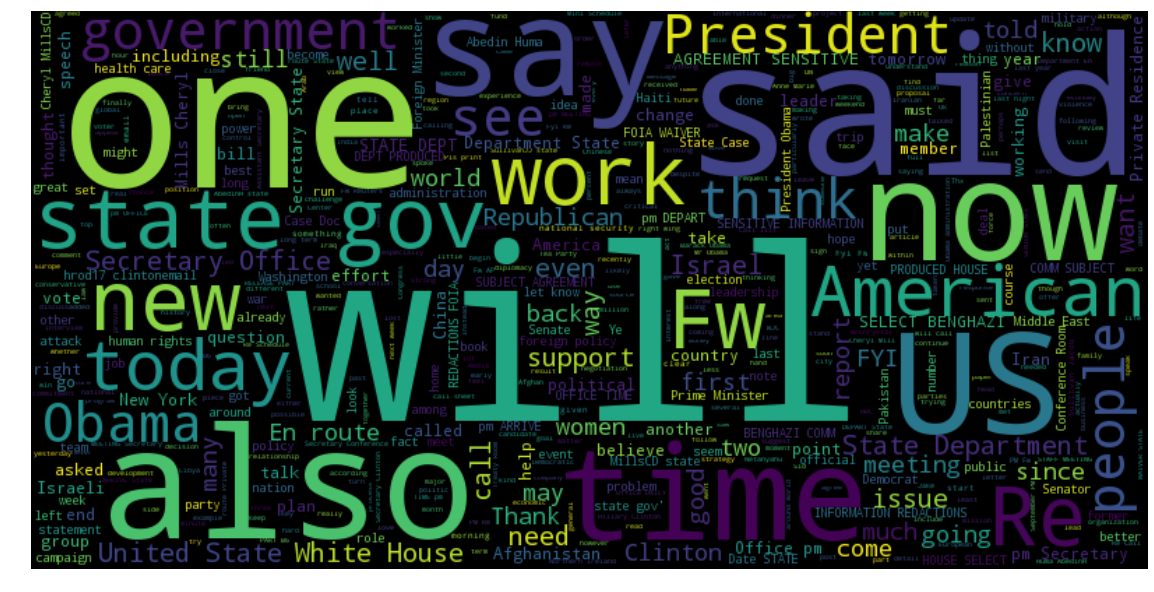

In [34]:
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()